In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
dataset = load_boston()

In [4]:
print(dataset.data) #data for the various columns of the dataset
print(dataset.feature_names) #name of each column
print(dataset.DESCR) # description of each feature
print(dataset.target) # The prices of houses

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-ret

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target #add the prices of the houses to the DataFrame
# display(df.head()) # show first 5 rows
# display(df.tail()) # show last 5 rows
df.info() #check the data type of each field
print(df.isnull().sum()) #check to see if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
corr = df.corr() # computes the pairwise correlation of columns
print(corr)
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)
#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Text(0, 0.5, 'MEDV')

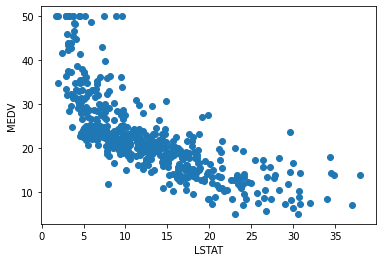

In [7]:
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

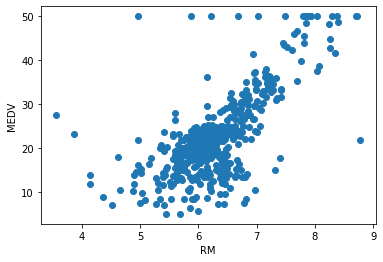

In [8]:
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')

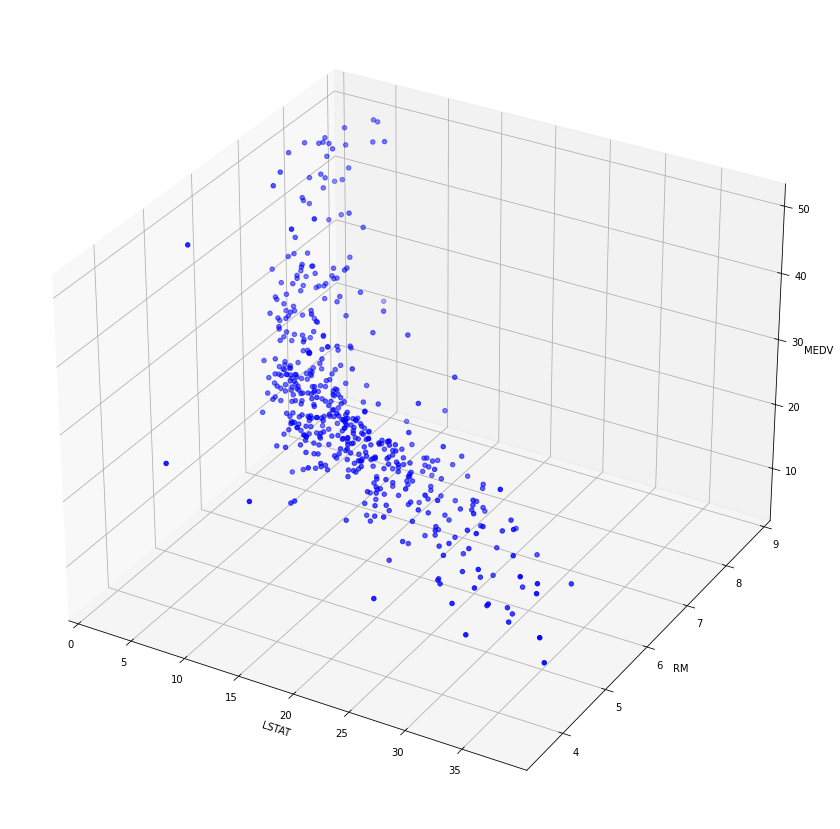

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [10]:
# linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM']) 
#combination of the LSTAT and RM features 
Y = df['MEDV'] #contain the MEDV label
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,random_state=5) 

In [11]:
# split the dataset into 70 percent for training and 30 percent
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)



(354, 2)
(354,)
(152, 2)
(152,)


In [12]:
model = LinearRegression()
model.fit(x_train, Y_train) #perform linear regression
price_pred = model.predict(x_test) #perform predictions using R-Squared method
print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.6162


36.49422110915324
0.38437936780346504
[-0.65957972  4.83197581]
[4.75686695]


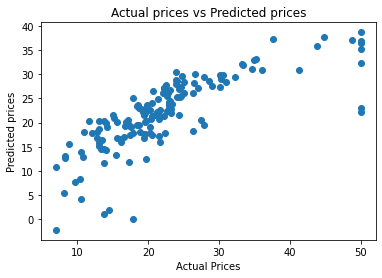

In [13]:
mse = mean_squared_error(Y_test, price_pred) #perform predictions using mse method
print(mse)
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
print(model.intercept_) #bias
print(model.coef_) #weight
print(model.predict([[30,5]])) #ex. prediction for the house price when LSTAT is 30 and RM is 5

Text(0.5, 0, 'MEDV')

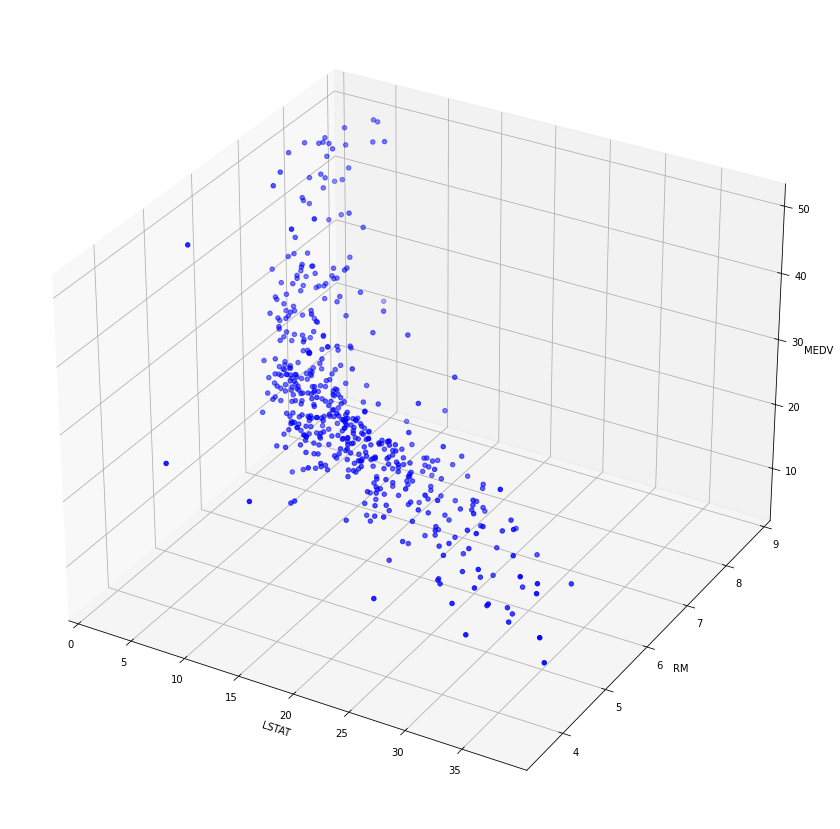

In [14]:
# 3D regression hyperplane
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'], x['RM'], Y, c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")



In [15]:
#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1) #---range for LSTAT---
y_surf = np.arange(0, 10, 1) #--- range for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf) #두 개의 1-D 배열에서 사각형 그리드



In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

LinearRegression()

In [17]:
# #---calculate z(MEDC) based on the model---
# z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
# ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), rstride=1, cstride=1, color='None', alpha = 0.4)
# plt.show()

In [28]:
# from sklearn.metrics import r2_score
# from sklearn.metrics import r2_score 
# y_pred = model2.predict(x) 
# r2_score(Y, y_pred)
# r2_score

In [18]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error 
model2 = Ridge()
model2.fit(x, Y)

Ridge()

In [29]:
model2.score(x, Y)

0.6385578036090929

In [30]:
model3 = Ridge(alpha = 0.001)
model3.fit(x, Y)
model3.score(x, Y)

0.6385616062564885

In [31]:
model4 = Ridge(alpha = 0.01)
model4.fit(x, Y)
model4.score(x, Y)

0.6385616058751975

In [32]:
model5 = Ridge(alpha = 1)
model5.fit(x, Y)
model5.score(x, Y)

0.6385578036090929

In [33]:
model6 = Ridge(alpha = 10)
model6.fit(x, Y)
model6.score(x, Y)

0.6382217303246607

In [34]:
model7 = Ridge(alpha = 1000)
model7.fit(x, Y)
model7.score(x, Y)

0.5685963000859049

In [36]:
model8 = Ridge(alpha = 100000000)
model8.fit(x, Y)
model8.score(x, Y)

0.0002825624064519694

In [37]:
# from sklearn.metrics import r2_score
# y_pred = model8.predict(x) 
# r2_score(Y, y_pred)

0.0002825624064519694